### Manual Feature Engineering

In [12]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [13]:
# Read in bureau
bureau = pd.read_csv('/Users/raghavan/Downloads/Home Credit Default Risk/bureau.csv')
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.000,-153.000,nan,0,91323.000,0.000,nan,0.000,Consumer credit,-131,nan
1,215354,5714463,Active,currency 1,-208,0,1075.000,nan,nan,0,225000.000,171342.000,nan,0.000,Credit card,-20,nan
2,215354,5714464,Active,currency 1,-203,0,528.000,nan,nan,0,464323.500,nan,nan,0.000,Consumer credit,-16,nan
3,215354,5714465,Active,currency 1,-203,0,nan,nan,nan,0,90000.000,nan,nan,0.000,Credit card,-16,nan
4,215354,5714466,Active,currency 1,-629,0,1197.000,nan,77674.500,0,2700000.000,nan,nan,0.000,Consumer credit,-21,nan


In [21]:
bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1716428.000,1716428.000,1716428.000,1716428.000,1610875.000,1082775.000,591940.000,1716428.000,1716415.000,1458759.000,1124648.000,1716428.000,1716428.000,489637.000
mean,278214.934,5924434.489,-1142.108,0.818,510.517,-1017.437,3825.418,0.006,354994.592,137085.120,6229.515,37.913,-593.748,15712.758
std,102938.558,532265.729,795.165,36.544,4994.220,714.011,206031.606,0.096,1149811.344,677401.131,45032.031,5937.650,720.747,325826.949
min,100001.000,5000000.000,-2922.000,0.000,-42060.000,-42023.000,0.000,0.000,0.000,-4705600.320,-586406.115,0.000,-41947.000,0.000
25%,188866.750,5463953.750,-1666.000,0.000,-1138.000,-1489.000,0.000,0.000,51300.000,0.000,0.000,0.000,-908.000,0.000
50%,278055.000,5926303.500,-987.000,0.000,-330.000,-897.000,0.000,0.000,125518.500,0.000,0.000,0.000,-395.000,0.000
75%,367426.000,6385681.250,-474.000,0.000,474.000,-425.000,0.000,0.000,315000.000,40153.500,0.000,0.000,-33.000,13500.000
max,456255.000,6843457.000,0.000,2792.000,31199.000,0.000,115987185.000,9.000,585000000.000,170100000.000,4705600.320,3756681.000,372.000,118453423.500


In [22]:
bureau.sort_values(["SK_ID_CURR","SK_ID_BUREAU"])

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
248484,100001,5896630,Closed,currency 1,-857,0,-492.000,-553.000,nan,0,112500.000,0.000,0.000,0.000,Consumer credit,-155,0.000
248485,100001,5896631,Closed,currency 1,-909,0,-179.000,-877.000,nan,0,279720.000,0.000,0.000,0.000,Consumer credit,-155,0.000
248486,100001,5896632,Closed,currency 1,-879,0,-514.000,-544.000,nan,0,91620.000,0.000,0.000,0.000,Consumer credit,-155,0.000
248487,100001,5896633,Closed,currency 1,-1572,0,-1329.000,-1328.000,nan,0,85500.000,0.000,0.000,0.000,Consumer credit,-155,0.000
248488,100001,5896634,Active,currency 1,-559,0,902.000,nan,nan,0,337680.000,113166.000,0.000,0.000,Consumer credit,-6,4630.500
248489,100001,5896635,Active,currency 1,-49,0,1778.000,nan,nan,0,378000.000,373239.000,0.000,0.000,Consumer credit,-16,10822.500
248490,100001,5896636,Active,currency 1,-320,0,411.000,nan,nan,0,168345.000,110281.500,nan,0.000,Consumer credit,-10,9364.500
1486113,100002,6113835,Closed,currency 1,-1043,0,62.000,-967.000,0.000,0,67500.000,nan,nan,0.000,Credit card,-758,0.000
1337779,100002,6158903,Active,currency 1,-1042,0,780.000,nan,nan,0,450000.000,245781.000,0.000,0.000,Consumer credit,-7,0.000
675684,100002,6158904,Closed,currency 1,-1125,0,-1038.000,-1038.000,nan,0,40761.000,nan,nan,0.000,Credit card,-1038,0.000


In [17]:
# Groupby the client id (SK_ID_CURR), count the number of previous loans, and rename the column
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})
previous_loan_counts.head()

,SK_ID_CURR,previous_loan_counts
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [16]:
# Join to the training dataframe
train = pd.read_csv('/Users/raghavan/Downloads/Home Credit Default Risk/application_train.csv')
train = train.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')

# Fill the missing values with 0 
train['previous_loan_counts'] = train['previous_loan_counts'].fillna(0)
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,previous_loan_counts
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,nan,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000,8.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,nan,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,nan,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,4.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,nan,0.556,0.730,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan

### Lets Check the usefullness of this feature

#### KDE plot 

In [18]:
# Plots the disribution of a variable colored by value of the target
def kde_target(var_name, df):
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = df['TARGET'].corr(df[var_name])
    df = df.dropna()
    # Calculate medians for repaid vs not repaid
    avg_repaid = df.ix[df['TARGET'] == 0, var_name].median()
    avg_not_repaid = df.ix[df['TARGET'] == 1, var_name].median()
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df.ix[df['TARGET'] == 0, var_name], label = 'TARGET == 0')
    sns.kdeplot(df.ix[df['TARGET'] == 1, var_name], label = 'TARGET == 1')
    
    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    plt.legend();
    
    # print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))
    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid =     %0.4f' % avg_repaid)
    

Lets check the function for the EXT_SOURCE_3 which is a very important variable according to model previously built

The correlation between EXT_SOURCE_3 and the TARGET is -0.1789
Median value for loan that was not repaid = 0.3665
Median value for loan that was repaid =     0.5209


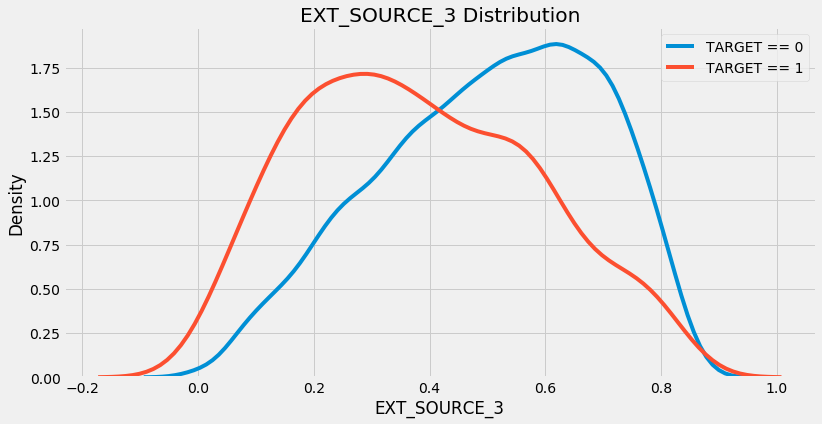

In [19]:
kde_target('EXT_SOURCE_3', train)

Lets check for the new variable

The correlation between previous_loan_counts and the TARGET is -0.0100
Median value for loan that was not repaid = 6.0000
Median value for loan that was repaid =     6.0000


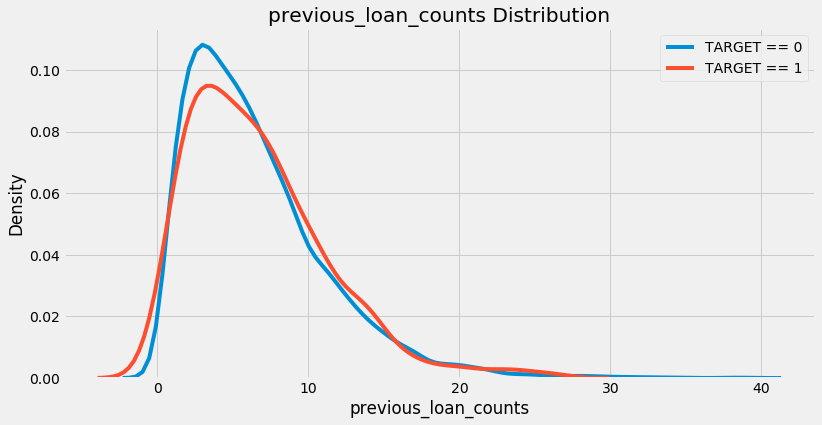

In [20]:
kde_target('previous_loan_counts', train)

    ^^ Not very sure if the above columns impacts ... Let add some more features and check them 

#### Aggregating Min , Max , mean from the bureau data

In [23]:
# Group by the client id, calculate aggregation statistics
bureau_agg = bureau.drop(columns = ['SK_ID_BUREAU']).groupby('SK_ID_CURR', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
bureau_agg.head()

SK_ID_CURR DAYS_CREDIT                            CREDIT_DAY_OVERDUE                   DAYS_CREDIT_ENDDATE                                       DAYS_ENDDATE_FACT                                        AMT_CREDIT_MAX_OVERDUE                                  CNT_CREDIT_PROLONG                   AMT_CREDIT_SUM                                             AMT_CREDIT_SUM_DEBT                                        AMT_CREDIT_SUM_LIMIT                                        AMT_CREDIT_SUM_OVERDUE                         DAYS_CREDIT_UPDATE                           AMT_ANNUITY                                   
                   count      mean  max   min   sum              count  mean max min sum               count     mean      max       min       sum             count      mean      max       min       sum                  count     mean      max   min      sum              count  mean max min sum          count       mean        max       min         sum               count       mean        max   min        sum                count       mean        max   min        sum                  count  mean   max   min   sum              count     mean  max   min   sum       count     mean       max   min       sum
0     100001           7  -735.000  -49 -1572 -5145                  7 0.000   0   0   0                   7   82.429 1778.000 -1329.000   577.000                 4  -825.500 -544.000 -1328.000 -3302.000                      0      nan      nan   nan      nan                  7 0.000   0   0   0              7 207623.571 378000.000 85500.000 1453365.000                   7  85240.929 373239.000 0.000 596686.500                    6      0.000      0.000 0.000      0.000                      7 0.000 0.000 0.000 0.000                  7  -93.143   -6  -155  -652           7 3545.357 10822.500 0.000 24817.500
1     100002           8  -874.000 -103 -1437 -6992                  8 0.000   0   0   0                   6 -349.000  780.000 -1072.000 -2094.000                 6  -697.500  -36.000 -1185.000 -4185.000                      5 1681.029 5043.645 0.000 8405.145                  8 0.000   0   0   0              8 108131.946 450000.000     0.000  865055.565                   5  49156.200 245781.000 0.000 245781.000                    4   7997.141  31988.565 0.000  31988.565                      8 0.000 0.000 0.000 0.000                  8 -499.875   -7 -1185 -3999           7    0.000     0.000 0.000     0.000
2     100003           4 -1400.750 -606 -2586 -5603                  4 0.000   0   0   0                   4 -544.500 1216.000 -2434.000 -2178.000                 3 -1097.333 -540.000 -2131.000 -3292.000                      4    0.000    0.000 0.000    0.000                  4 0.000   0   0   0              4 254350.125 810000.000 22248.000 1017400.500                   4      0.000      0.000 0.000      0.000                    4 202500.000 810000.000 0.000 810000.000                      4 0.000 0.000 0.000 0.000                  4 -816.000  -43 -2131 -3264           0      nan       nan   nan       nan
3     100004           2  -867.000 -408 -1326 -1734                  2 0.000   0   0   0                   2 -488.500 -382.000  -595.000  -977.000                 2  -532.500 -382.000  -683.000 -1065.000                      1    0.000    0.000 0.000    0.000                  2 0.000   0   0   0              2  94518.900  94537.800 94500.000  189037.800                   2      0.000      0.000 0.000      0.000                    2      0.000      0.000 0.000      0.000                      2 0.000 0.000 0.000 0.000                  2 -532.000 -382  -682 -1064           0      nan       nan   nan       nan
4     100005           3  -190.667  -62  -373  -572                  3 0.000   0   0   0                   3  439.333 1324.000  -128.000  1318.000                 1  -123.000 -123.000  -123.000  -123.000                      1    0.000    0.000 0.000    0.000                  3 0.000   0   0   0              3 219042

##### Lets create names for the new columns

In [24]:
# List of column names
columns = ['SK_ID_CURR']

# Iterate through the variables names
for var in bureau_agg.columns.levels[0]:
    # Skip the id name
    if var != 'SK_ID_CURR':
        
        # Iterate through the stat names
        for stat in bureau_agg.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            columns.append('bureau_%s_%s' % (var, stat))

In [25]:
bureau_agg.columns = columns
bureau_agg.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,bureau_CREDIT_DAY_OVERDUE_sum,bureau_DAYS_CREDIT_ENDDATE_count,bureau_DAYS_CREDIT_ENDDATE_mean,bureau_DAYS_CREDIT_ENDDATE_max,bureau_DAYS_CREDIT_ENDDATE_min,bureau_DAYS_CREDIT_ENDDATE_sum,bureau_DAYS_ENDDATE_FACT_count,bureau_DAYS_ENDDATE_FACT_mean,bureau_DAYS_ENDDATE_FACT_max,bureau_DAYS_ENDDATE_FACT_min,bureau_DAYS_ENDDATE_FACT_sum,bureau_AMT_CREDIT_MAX_OVERDUE_count,bureau_AMT_CREDIT_MAX_OVERDUE_mean,bureau_AMT_CREDIT_MAX_OVERDUE_max,bureau_AMT_CREDIT_MAX_OVERDUE_min,bureau_AMT_CREDIT_MAX_OVERDUE_sum,bureau_CNT_CREDIT_PROLONG_count,bureau_CNT_CREDIT_PROLONG_mean,bureau_CNT_CREDIT_PROLONG_max,bureau_CNT_CREDIT_PROLONG_min,bureau_CNT_CREDIT_PROLONG_sum,bureau_AMT_CREDIT_SUM_count,bureau_AMT_CREDIT_SUM_mean,bureau_AMT_CREDIT_SUM_max,bureau_AMT_CREDIT_SUM_min,bureau_AMT_CREDIT_SUM_sum,bureau_AMT_CREDIT_SUM_DEBT_count,bureau_AMT_CREDIT_SUM_DEBT_mean,bureau_AMT_CREDIT_SUM_DEBT_max,bureau_AMT_CREDIT_SUM_DEBT_min,bureau_AMT_CREDIT_SUM_DEBT_sum,bureau_AMT_CREDIT_SUM_LIMIT_count,bureau_AMT_CREDIT_SUM_LIMIT_mean,bureau_AMT_CREDIT_SUM_LIMIT_max,bureau_AMT_CREDIT_SUM_LIMIT_min,bureau_AMT_CREDIT_SUM_LIMIT_sum,bureau_AMT_CREDIT_SUM_OVERDUE_count,bureau_AMT_CREDIT_SUM_OVERDUE_mean,bureau_AMT_CREDIT_SUM_OVERDUE_max,bureau_AMT_CREDIT_SUM_OVERDUE_min,bureau_AMT_CREDIT_SUM_OVERDUE_sum,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,7,-735.000,-49,-1572,-5145,7,0.000,0,0,0,7,82.429,1778.000,-1329.000,577.000,4,-825.500,-544.000,-1328.000,-3302.000,0,nan,nan,nan,nan,7,0.000,0,0,0,7,207623.571,378000.000,85500.000,1453365.000,7,85240.929,373239.000,0.000,596686.500,6,0.000,0.000,0.000,0.000,7,0.000,0.000,0.000,0.000,7,-93.143,-6,-155,-652,7,3545.357,10822.500,0.000,24817.500
1,100002,8,-874.000,-103,-1437,-6992,8,0.000,0,0,0,6,-349.000,780.000,-1072.000,-2094.000,6,-697.500,-36.000,-1185.000,-4185.000,5,1681.029,5043.645,0.000,8405.145,8,0.000,0,0,0,8,108131.946,450000.000,0.000,865055.565,5,49156.200,245781.000,0.000,245781.000,4,7997.141,31988.565,0.000,31988.565,8,0.000,0.000,0.000,0.000,8,-499.875,-7,-1185,-3999,7,0.000,0.000,0.000,0.000
2,100003,4,-1400.750,-606,-2586,-5603,4,0.000,0,0,0,4,-544.500,1216.000,-2434.000,-2178.000,3,-1097.333,-540.000,-2131.000,-3292.000,4,0.000,0.000,0.000,0.000,4,0.000,0,0,0,4,254350.125,810000.000,22248.000,1017400.500,4,0.000,0.000,0.000,0.000,4,202500.000,810000.000,0.000,810000.000,4,0.000,0.000,0.000,0.000,4,-816.000,-43,-2131,-3264,0,nan,nan,nan,nan
3,100004,2,-867.000,-408,-1326,-1734,2,0.000,0,0,0,2,-488.500,-382.000,-595.000,-977.000,2,-532.500,-382.000,-683.000,-1065.000,1,0.000,0.000,0.000,0.000,2,0.000,0,0,0,2,94518.900,94537.800,94500.000,189037.800,2,0.000,0.000,0.000,0.000,2,0.000,0.000,0.000,0.000,2,0.000,0.000,0.000,0.000,2,-532.000,-382,-682,-1064,0,nan,nan,nan,nan
4,100005,3,-190.667,-62,-373,-572,3,0.000,0,0,0,3,439.333,1324.000,-128.000,1318.000,1,-123.000,-123.000,-123.000,-123.000,1,0.000,0.000,0.000,0.000,3,0.000,0,0,0,3,219042.000,568800.000,29826.000,657126.000,3,189469.500,543087.000,0.000,568408.500,3,0.000,0.000,0.000,0.000,3,0.000,0.000,0.000,0.000,3,-54.333,-11,-121,-163,3,1420.500,4261.500,0.000,4261.500


In [26]:
# Merge with the training data
train = train.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,previous_loan_counts,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,bureau_CREDIT_DAY_OVERDUE_sum,bureau_DAYS_CREDIT_ENDDATE_count,bureau_DAYS_CREDIT_ENDDATE_mean,bureau_DAYS_CREDIT_ENDDATE_max,bureau_DAYS_CREDIT_ENDDATE_min,bureau_DAYS_CREDIT_ENDDATE_sum,bureau_DAYS_ENDDATE_FACT_count,bureau_DAYS_ENDDATE_FACT_mean,bureau_DAYS_ENDDATE_FACT_max,bureau_DAYS_ENDDATE_FACT_min,bureau_DAYS_ENDDATE_FACT_sum,bureau_AMT_CREDIT_MAX_OVERDUE_count,bureau_AMT_CREDIT_MAX_OVERDUE_mean,bureau_AMT_CREDIT_MAX_OVERDUE_max,bureau_AMT_CREDIT_MAX_OVERDUE_min,bureau_AMT_CREDIT_MAX_OVERDUE_sum,bureau_CNT_CREDIT_PROLONG_count,bureau_CNT_CREDIT_PROLONG_mean,bureau_CNT_CREDIT_PROLONG_max,bureau_CNT_CREDIT_PROLONG_min,bureau_CNT_CREDIT_PROLONG_sum,bureau_AMT_CREDIT_SUM_count,bureau_AMT_CREDIT_SUM_mean,bureau_AMT_CREDIT_SUM_max,bureau_AMT_CREDIT_SUM_min,bureau_AMT_CREDIT_SUM_sum,bureau_AMT_CREDIT_SUM_DEBT_count,bureau_AMT_CREDIT_SUM_DEBT_mean,bureau_AMT_CREDIT_SUM_DEBT_max,bureau_AMT_CREDIT_SUM_DEBT_min,bureau_AMT_CREDIT_SUM_DEBT_sum,bureau_AMT_CREDIT_SUM_LIMIT_count,bureau_AMT_CREDIT_SUM_LIMIT_mean,bureau_AMT_CREDIT_SUM_LIMIT_max,bureau_AMT_CREDIT_SUM_LIMIT_min,bureau_AMT_CREDIT_SUM_LIMIT_sum,bureau_AMT_CREDIT_SUM_OVERDUE_count,bureau_AMT_CREDIT_SUM_OVERDUE_mean,bureau_AMT_CREDIT_SUM_OVERDUE_max,bureau_AMT_CREDIT_SUM_OVERDUE_min,bureau_AMT_CREDIT_SUM_OVERDUE_sum,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min

#### Lets compute and check the correlation for values

In [27]:
# List of new correlations
new_corrs = []

# Iterate through the columns 
for col in columns:
    # Calculate correlation with the target
    corr = train['TARGET'].corr(train[col])
    
    # Append the list as a tuple

    new_corrs.append((col, corr))

In [28]:
new_corrs = sorted(new_corrs, key = lambda x: abs(x[1]), reverse = True)
new_corrs[:15]

[('bureau_DAYS_CREDIT_mean', 0.089728967219981276),
 ('bureau_DAYS_CREDIT_min', 0.075248251030103866),
 ('bureau_DAYS_CREDIT_UPDATE_mean', 0.068927352669686762),
 ('bureau_DAYS_ENDDATE_FACT_min', 0.055887379843920323),
 ('bureau_DAYS_CREDIT_ENDDATE_sum', 0.05423535215303945),
 ('bureau_DAYS_ENDDATE_FACT_mean', 0.05319962585758576),
 ('bureau_DAYS_CREDIT_max', 0.04978205463997315),
 ('bureau_DAYS_CREDIT_ENDDATE_mean', 0.046982754334835487),
 ('bureau_DAYS_CREDIT_UPDATE_min', 0.042863922470730259),
 ('bureau_DAYS_CREDIT_sum', 0.041999824814846737),
 ('bureau_DAYS_CREDIT_UPDATE_sum', 0.041403635353060082),
 ('bureau_DAYS_ENDDATE_FACT_sum', 0.038956854836625081),
 ('bureau_DAYS_CREDIT_ENDDATE_max', 0.036589634696329192),
 ('bureau_DAYS_CREDIT_ENDDATE_min', 0.034281109921616135),
 ('bureau_DAYS_ENDDATE_FACT_count', -0.030492306653325526)]

^^ None of the above variable seems to have good corr with the target values . Any way lets check the kde plot of bureau_DAYS_CREDIT_mean

The correlation between bureau_DAYS_CREDIT_mean and the TARGET is 0.0897
Median value for loan that was not repaid = -903.2000
Median value for loan that was repaid =     -1139.8333


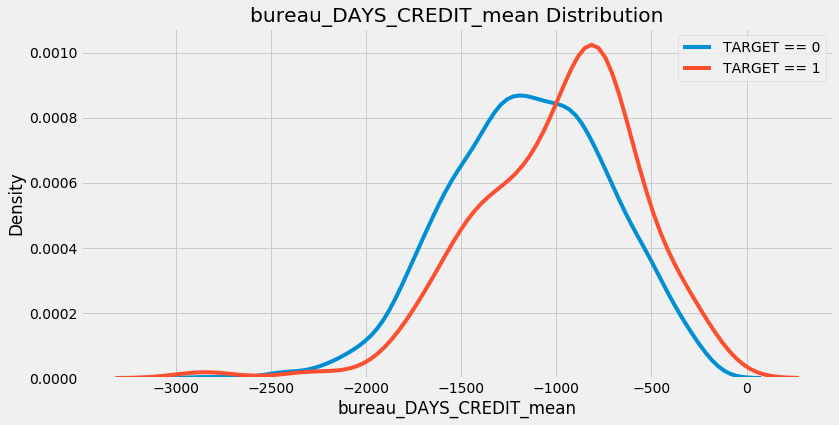

In [30]:
kde_target('bureau_DAYS_CREDIT_mean', train)

#### Lets normalize this work into function , so that it can be reused

In [31]:
def agg_numeric(df, group_var, df_name):
    """Aggregates the numeric values in a dataframe. This can
    be used to create features for each instance of the grouping variable.
    
    Parameters
    --------
        df (dataframe): 
            the dataframe to calculate the statistics on
        group_var (string): 
            the variable by which to group df
        df_name (string): 
            the variable used to rename the columns
        
    Return
    --------
        agg (dataframe): 
            a dataframe with the statistics aggregated for 
            all numeric columns. Each instance of the grouping variable will have 
            the statistics (mean, min, max, sum; currently supported) calculated. 
            The columns are also renamed to keep track of features created.
    
    """
    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

In [32]:
bureau_agg_new = agg_numeric(bureau.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_agg_new.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,bureau_CREDIT_DAY_OVERDUE_sum,bureau_DAYS_CREDIT_ENDDATE_count,bureau_DAYS_CREDIT_ENDDATE_mean,bureau_DAYS_CREDIT_ENDDATE_max,bureau_DAYS_CREDIT_ENDDATE_min,bureau_DAYS_CREDIT_ENDDATE_sum,bureau_DAYS_ENDDATE_FACT_count,bureau_DAYS_ENDDATE_FACT_mean,bureau_DAYS_ENDDATE_FACT_max,bureau_DAYS_ENDDATE_FACT_min,bureau_DAYS_ENDDATE_FACT_sum,bureau_AMT_CREDIT_MAX_OVERDUE_count,bureau_AMT_CREDIT_MAX_OVERDUE_mean,bureau_AMT_CREDIT_MAX_OVERDUE_max,bureau_AMT_CREDIT_MAX_OVERDUE_min,bureau_AMT_CREDIT_MAX_OVERDUE_sum,bureau_CNT_CREDIT_PROLONG_count,bureau_CNT_CREDIT_PROLONG_mean,bureau_CNT_CREDIT_PROLONG_max,bureau_CNT_CREDIT_PROLONG_min,bureau_CNT_CREDIT_PROLONG_sum,bureau_AMT_CREDIT_SUM_count,bureau_AMT_CREDIT_SUM_mean,bureau_AMT_CREDIT_SUM_max,bureau_AMT_CREDIT_SUM_min,bureau_AMT_CREDIT_SUM_sum,bureau_AMT_CREDIT_SUM_DEBT_count,bureau_AMT_CREDIT_SUM_DEBT_mean,bureau_AMT_CREDIT_SUM_DEBT_max,bureau_AMT_CREDIT_SUM_DEBT_min,bureau_AMT_CREDIT_SUM_DEBT_sum,bureau_AMT_CREDIT_SUM_LIMIT_count,bureau_AMT_CREDIT_SUM_LIMIT_mean,bureau_AMT_CREDIT_SUM_LIMIT_max,bureau_AMT_CREDIT_SUM_LIMIT_min,bureau_AMT_CREDIT_SUM_LIMIT_sum,bureau_AMT_CREDIT_SUM_OVERDUE_count,bureau_AMT_CREDIT_SUM_OVERDUE_mean,bureau_AMT_CREDIT_SUM_OVERDUE_max,bureau_AMT_CREDIT_SUM_OVERDUE_min,bureau_AMT_CREDIT_SUM_OVERDUE_sum,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,7,-735.000,-49,-1572,-5145,7,0.000,0,0,0,7,82.429,1778.000,-1329.000,577.000,4,-825.500,-544.000,-1328.000,-3302.000,0,nan,nan,nan,nan,7,0.000,0,0,0,7,207623.571,378000.000,85500.000,1453365.000,7,85240.929,373239.000,0.000,596686.500,6,0.000,0.000,0.000,0.000,7,0.000,0.000,0.000,0.000,7,-93.143,-6,-155,-652,7,3545.357,10822.500,0.000,24817.500
1,100002,8,-874.000,-103,-1437,-6992,8,0.000,0,0,0,6,-349.000,780.000,-1072.000,-2094.000,6,-697.500,-36.000,-1185.000,-4185.000,5,1681.029,5043.645,0.000,8405.145,8,0.000,0,0,0,8,108131.946,450000.000,0.000,865055.565,5,49156.200,245781.000,0.000,245781.000,4,7997.141,31988.565,0.000,31988.565,8,0.000,0.000,0.000,0.000,8,-499.875,-7,-1185,-3999,7,0.000,0.000,0.000,0.000
2,100003,4,-1400.750,-606,-2586,-5603,4,0.000,0,0,0,4,-544.500,1216.000,-2434.000,-2178.000,3,-1097.333,-540.000,-2131.000,-3292.000,4,0.000,0.000,0.000,0.000,4,0.000,0,0,0,4,254350.125,810000.000,22248.000,1017400.500,4,0.000,0.000,0.000,0.000,4,202500.000,810000.000,0.000,810000.000,4,0.000,0.000,0.000,0.000,4,-816.000,-43,-2131,-3264,0,nan,nan,nan,nan
3,100004,2,-867.000,-408,-1326,-1734,2,0.000,0,0,0,2,-488.500,-382.000,-595.000,-977.000,2,-532.500,-382.000,-683.000,-1065.000,1,0.000,0.000,0.000,0.000,2,0.000,0,0,0,2,94518.900,94537.800,94500.000,189037.800,2,0.000,0.000,0.000,0.000,2,0.000,0.000,0.000,0.000,2,0.000,0.000,0.000,0.000,2,-532.000,-382,-682,-1064,0,nan,nan,nan,nan
4,100005,3,-190.667,-62,-373,-572,3,0.000,0,0,0,3,439.333,1324.000,-128.000,1318.000,1,-123.000,-123.000,-123.000,-123.000,1,0.000,0.000,0.000,0.000,3,0.000,0,0,0,3,219042.000,568800.000,29826.000,657126.000,3,189469.500,543087.000,0.000,568408.500,3,0.000,0.000,0.000,0.000,3,0.000,0.000,0.000,0.000,3,-54.333,-11,-121,-163,3,1420.500,4261.500,0.000,4261.500


#### Lets also make corr calculation a function

In [34]:
# Function to calculate correlations with the target for a dataframe
def target_corrs(df):

    # List of correlations
    corrs = []

    # Iterate through the columns 
    for col in df.columns:
        print(col)
        # Skip the target column
        if col != 'TARGET':
            # Calculate correlation with the target
            corr = df['TARGET'].corr(df[col])

            # Append the list as a tuple
            corrs.append((col, corr))
            
    # Sort by absolute magnitude of correlations
    corrs = sorted(corrs, key = lambda x: abs(x[1]), reverse = True)
    
    return corrs